In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import  seaborn as sns

from utility import utilities

In [11]:
df = pd.read_table('hypo_2.txt')
df.set_index('Fasta headers',inplace=True)
#rename columns
df.columns = ['ND_1','ND_2','ND_3','HF_1','HF_2','HF_3','KO_1','KO_2','KO_3','null']
#print (df.reset_index(drop=True).head())

#remove all zeros rows
print ('before', df.shape)
df = df[(df.T != 0).any()]
print ('after', df.shape)


before (8304, 10)
after (7582, 10)


/Users/mtinti/miniconda2/envs/commonPy3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


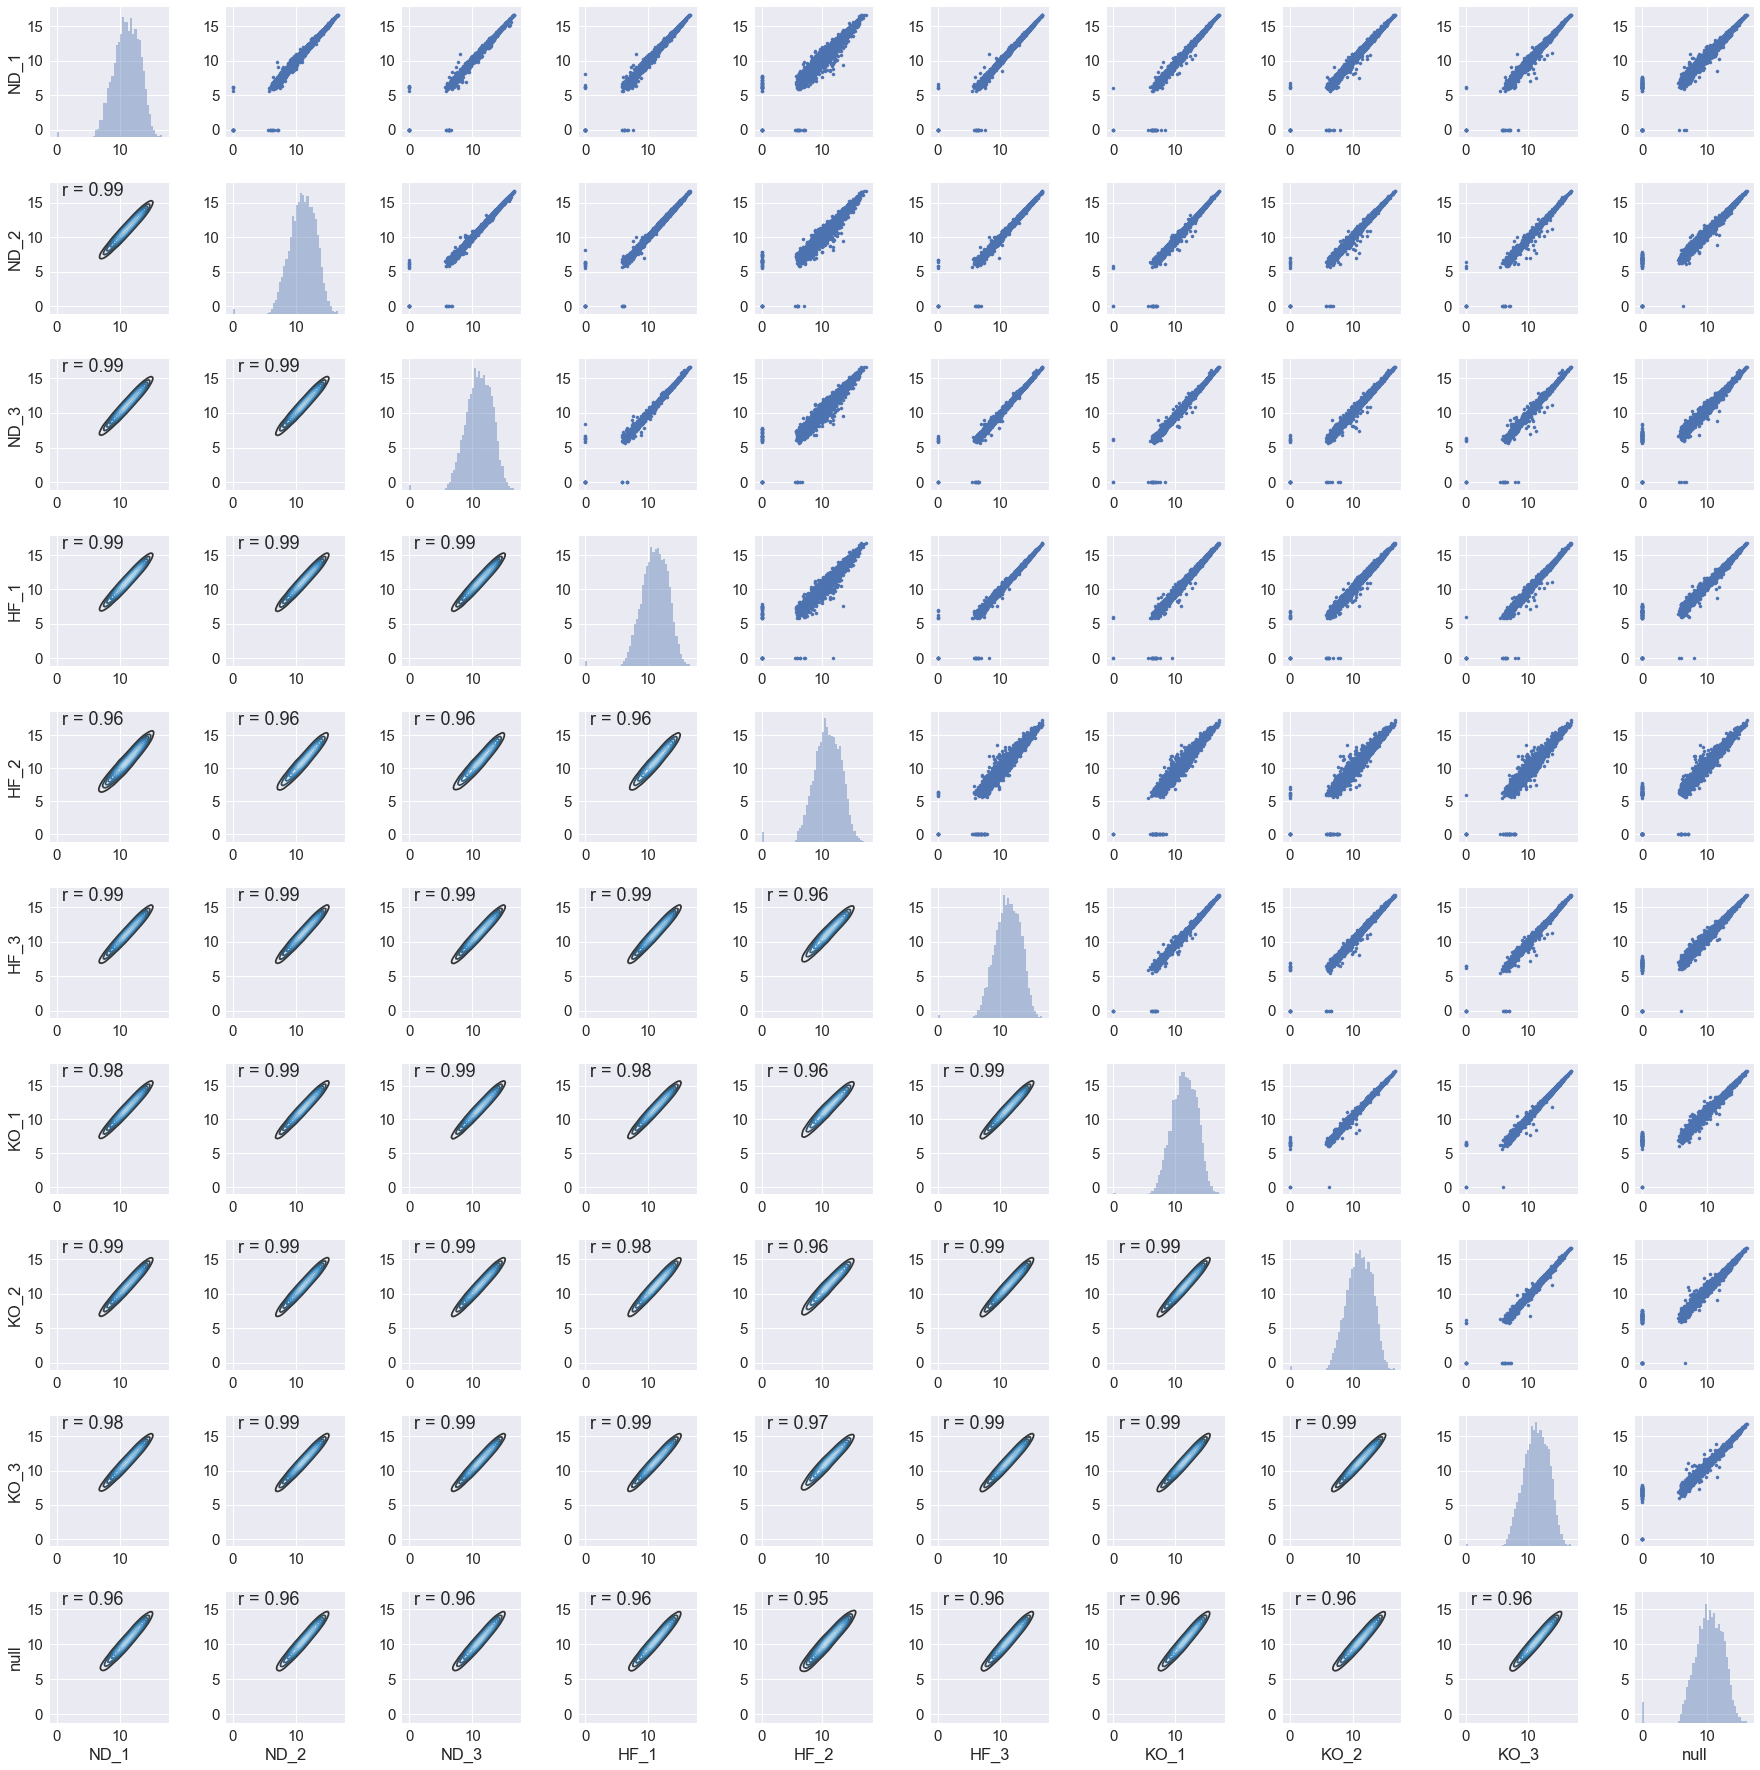

In [3]:
#visualize reproducibility
utilities.make_scatter_matrix(np.log1p(df), 'pre_norm_hippo')


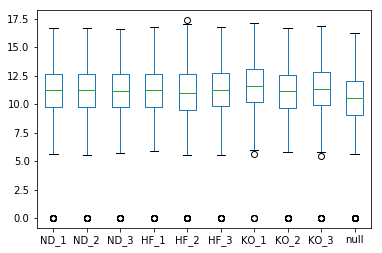

In [12]:
#data distribution before normalization
np.log1p(df).plot(kind='box')
plt.show()

1 0.07935858875455959 4.454929666485901
2 0.0007102602112154313 0.053953995612695795
3 1.0504221005860903e-05 0.0009796742688943025
4 1.9237804638888578e-07 1.978951550808683e-05
5 3.822691947708012e-09 4.0681096482447776e-07
normalized in 5 steps


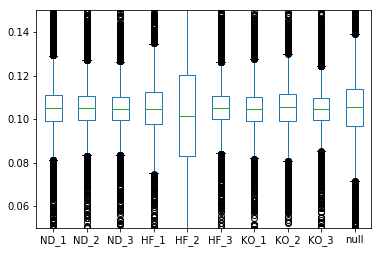

In [13]:
#data distribution after normalization
norm_df = utilities.constandNormalize(df)
np.log1p(norm_df).plot(kind='box')
plt.ylim(0.05,0.15)
plt.show()

[0.45711969 0.13753374]


No handles with labels found to put in legend.


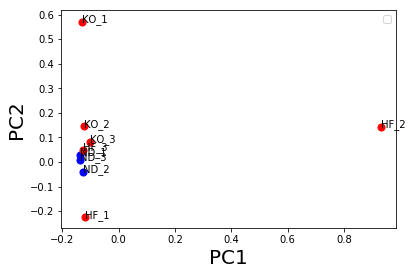

In [14]:
#visualize pca data
utilities.make_pca(norm_df)

In [15]:

#for visualization later
norm_df['mean_ND'] = norm_df[['ND_1','ND_2','ND_3']].median(axis=1)
norm_df['mean_HF'] = norm_df[['HF_1','HF_2','HF_3']].median(axis=1)
norm_df['mean_KO'] = norm_df[['KO_1','KO_2','KO_3']].median(axis=1)

norm_df['log2_fc_HF_ND'] = np.log2(norm_df['mean_HF']/norm_df['mean_ND'])
norm_df['log2_fc_ND_KO'] = np.log2(norm_df['mean_ND']/norm_df['mean_KO'])
norm_df['log2_fc_HF_KO'] = np.log2(norm_df['mean_HF']/norm_df['mean_KO'])

norm_df['exp10_HF_ND'] = np.exp(norm_df['mean_HF']+norm_df['mean_ND'])
norm_df['exp10_ND_KO'] = np.exp(norm_df['mean_ND']+norm_df['mean_KO'])
norm_df['exp10_HF_KO'] = np.exp(norm_df['mean_HF']+norm_df['mean_KO'])



/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys
/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  
/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':


In [16]:
#visualize dataset
norm_df.reset_index(drop=True).head()

,ND_1,ND_2,ND_3,HF_1,HF_2,HF_3,KO_1,KO_2,KO_3,null,mean_ND,mean_HF,mean_KO,log2_fc_HF_ND,log2_fc_ND_KO,log2_fc_HF_KO,exp10_HF_ND,exp10_ND_KO,exp10_HF_KO
0,0.114189,0.101885,0.110564,0.121030,0.102414,0.114738,0.103620,0.110001,0.105431,0.127240,0.110564,0.114738,0.105431,0.053458,0.068574,0.122032,1.252700,1.241096,1.246287
1,0.112497,0.105953,0.106045,0.110665,0.138656,0.108202,0.105379,0.105202,0.102043,0.116469,0.106045,0.110665,0.105202,0.061518,0.011511,0.073030,1.241984,1.235218,1.240938
2,0.105587,0.108882,0.098598,0.099061,0.160055,0.100519,0.105855,0.109629,0.103869,0.119057,0.105587,0.100519,0.105855,-0.070961,-0.003659,-0.074620,1.228883,1.235457,1.229212
3,0.096467,0.098959,0.094299,0.097526,0.206741,0.094342,0.099569,0.101133,0.100759,0.121316,0.096467,0.097526,0.100759,0.015757,-0.062811,-0.047054,1.214087,1.218019,1.219310
4,0.102471,0.095251,0.097631,0.094339,0.217397,0.094534,0.100239,0.100282,0.095241,0.113727,0.097631,0.094534,0.100239,-0.046502,-0.038042,-0.084544,1.211870,1.218803,1.215035


/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/statsmodels/stats/multitest.py:147: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/statsmodels/stats/multitest.py:251: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1]

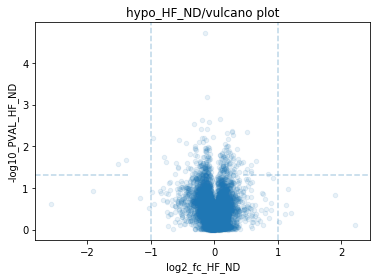

In [17]:
#t-test between normal diet and high fat diet 
#from scipy.stats import ttest_ind
#onesample_results = ttest_ind(norm_df[['HF_1','HF_2','HF_3']].T, norm_df[['ND_1','ND_2','ND_3']].T)
#utilities.make_analysis(norm_df, onesample_results, tag='HF_ND')

tag_1='HF'
tag_2='ND'
import os
tag = tag_1 +'_'+tag_2
os.makedirs('hypo_'+tag)
from statsmodels.sandbox.stats.multicomp import multipletests
def make_analysis(norm_df, onesample_results, tag):
    # Set up the figure
    f, ax = plt.subplots()
    #ax.set_aspect("equal")
    # Draw the two density plots
        #correct for multy-hypotesis
    norm_df['T_'+tag]=onesample_results[0]
    norm_df['PVAL_'+tag]=onesample_results[1]    
    norm_df['-log10_PVAL_'+tag] = -np.log10(norm_df['PVAL_'+tag])
    p_adjusted = multipletests(norm_df['PVAL_'+tag], method='bonferroni')
    norm_df['PVAL_'+tag+'_ADJ']=p_adjusted[1]
    norm_df.plot(kind='scatter',x='log2_fc_'+tag,y='-log10_PVAL_'+tag, ax=ax, alpha=0.1)
    #norm_df = norm_df[['log2_fc_'+tag, '-log10_PVAL_'+tag]]
    #norm_df = norm_df.dropna()
    #norm_df.plot(kind='scatter',x='log2_fc_'+tag,y='-log10_PVAL_'+tag, alpha=0.1,s=1,ax=ax)
    #sns.kdeplot(norm_df['log2_fc_'+tag], norm_df['-log10_PVAL_'+tag],
                 #cmap="Blues", shade=True, shade_lowest=False, ax=ax)
    
    
    ax.axvline(x=1, ymin=0, ymax=1, ls='--',alpha=0.3)
    ax.axvline(x=-1, ymin=0, ymax=1, ls='--',alpha=0.3)
    ax.axhline(y=-np.log10(0.05), xmin=0, xmax=0.28, ls='--',alpha=0.3)
    ax.axhline(y=-np.log10(0.05), xmin=0.62, xmax=1, ls='--',alpha=0.3)
    plt.title('hypo_'+tag+'/'+'vulcano plot')
    plt.savefig('hypo_'+tag+'/'+'vulcano.png')

onesample_results = ttest_ind(norm_df[['HF_1','HF_2','HF_3']].T, 
                              norm_df[['ND_1','ND_2','ND_3']].T)
make_analysis(norm_df, onesample_results, tag=tag) 
temp = norm_df[[tag_1+'_1',tag_1+'_2',tag_1+'_3',
                tag_2+'_1',tag_2+'_2',tag_2+'_3','log2_fc_'+tag,'-log10_PVAL_'+tag]]
temp = temp.sort_values('-log10_PVAL_'+tag)
temp = temp[(temp['log2_fc_'+tag]<-1) | (temp['log2_fc_'+tag]<-1)].sort_values('-log10_PVAL_'+tag)
temp.head()
temp.to_csv('hypo_'+tag+'/'+'data_'+tag+'.csv')
#norm_df[['PVAL_'+tag+'_ADJ', 'PVAL_'+tag]].sort_values('PVAL_'+tag)


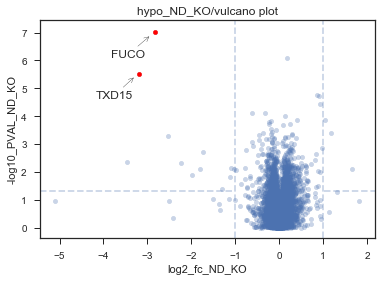

In [37]:
#t-test between normal diet and KO - high fat diet 
#from scipy.stats import ttest_ind
#onesample_results = ttest_ind(norm_df[['ND_1','ND_2','ND_3']].T, norm_df[['KO_1','KO_2','KO_3']].T)
#utilities.make_analysis(norm_df, onesample_results, tag='ND_KO')
tag_1='ND'
tag_2='KO'
import os
tag = tag_1 +'_'+tag_2
#os.makedirs('hypo_'+tag)
sns.set(style="ticks")
from statsmodels.sandbox.stats.multicomp import multipletests
def make_analysis(norm_df, onesample_results, tag):
    
    # Set up the figure
    f, ax = plt.subplots()
    #ax.set_aspect("equal")
    # Draw the two density plots
        #correct for multy-hypotesis
    norm_df['T_'+tag]=onesample_results[0]
    norm_df['PVAL_'+tag]=onesample_results[1]         
    norm_df['-log10_PVAL_'+tag] = -np.log10(norm_df['PVAL_'+tag])
    p_adjusted = multipletests(norm_df['PVAL_'+tag], method='bonferroni')
    norm_df['PVAL_'+tag+'_ADJ']=p_adjusted[1]
    norm_df.plot(kind='scatter',x='log2_fc_'+tag,y='-log10_PVAL_'+tag, ax=ax, alpha=0.3)
    prots = ['tr|Q3TCW3|Q3TCW3_MOUSE Putative uncharacterized protein OS=Mus musculus GN=Fuca1 PE=2 SV=1;sp|Q99LJ1|FUCO_MOUSE Tissue alpha-L-fucosidase OS=Mus musculus GN=Fuca1 PE=1 SV=1',
             'sp|Q6P6J9|TXD15_MOUSE Thioredoxin domain-containing protein 15 OS=Mus musculus GN=Txndc15 PE=1 SV=1',
            ]
    norm_df.loc[prots].plot(kind='scatter',x='log2_fc_'+tag,y='-log10_PVAL_'+tag, ax=ax, c='r')
    
    x=norm_df.loc[prots[0]]['log2_fc_'+tag]-0.1
    y=norm_df.loc[prots[0]]['-log10_PVAL_'+tag]-0.1
    xt = norm_df.loc[prots[0]]['log2_fc_'+tag]-1
    yt = norm_df.loc[prots[0]]['-log10_PVAL_'+tag]-0.9
    ax.annotate('FUCO', 

                xy=(x, y), 
                xytext=(xt, yt),
            arrowprops=dict(facecolor='black',  arrowstyle="->"),
            )
    
    x=norm_df.loc[prots[1]]['log2_fc_'+tag]-0.1
    y=norm_df.loc[prots[1]]['-log10_PVAL_'+tag]-0.1
    xt = norm_df.loc[prots[1]]['log2_fc_'+tag]-1
    yt = norm_df.loc[prots[1]]['-log10_PVAL_'+tag]-0.9
    ax.annotate('TXD15', 

                xy=(x, y), 
                xytext=(xt, yt),
            arrowprops=dict(facecolor='black',  arrowstyle="->"),
            )
    #norm_df = norm_df[['log2_fc_'+tag, '-log10_PVAL_'+tag]]
    #norm_df = norm_df.dropna()
    #norm_df.plot(kind='scatter',x='log2_fc_'+tag,y='-log10_PVAL_'+tag, alpha=0.1,s=1,ax=ax)
    #sns.kdeplot(norm_df['log2_fc_'+tag], norm_df['-log10_PVAL_'+tag],
                 #cmap="Blues", shade=True, shade_lowest=False, ax=ax)
    
    ax.axvline(x=1, ymin=0, ymax=1, ls='--',alpha=0.3)
    ax.axvline(x=-1, ymin=0, ymax=1, ls='--',alpha=0.3)
    ax.axhline(y=-np.log10(0.05), xmin=0, xmax=0.58, ls='--',alpha=0.3)
    ax.axhline(y=-np.log10(0.05), xmin=0.85, xmax=1, ls='--',alpha=0.3)
    plt.title('hypo_'+tag+'/'+'vulcano plot')
    plt.savefig('hypo_'+tag+'/'+'vulcano.svg')
    plt.show()
    return 

onesample_results = ttest_ind(norm_df[[tag_1+'_1',tag_1+'_2',tag_1+'_3']].T, 
                              norm_df[[tag_2+'_1',tag_2+'_2',tag_2+'_3']].T)
make_analysis(norm_df, onesample_results, tag=tag) 
temp = norm_df[[tag_1+'_1',tag_1+'_2',tag_1+'_3',
                tag_2+'_1',tag_2+'_2',tag_2+'_3','log2_fc_'+tag,'-log10_PVAL_'+tag]]
temp = temp.sort_values('-log10_PVAL_'+tag)
temp = temp[(temp['log2_fc_'+tag]<-1) | (temp['log2_fc_'+tag]<-1)].sort_values('-log10_PVAL_'+tag)
temp.head()
temp.to_csv('hypo_'+tag+'/'+'data_'+tag+'.csv')

In [10]:
#print the significant one in the normalized and raw data
test = norm_df[norm_df['PVAL_ND_KO_ADJ']<0.05]
test[['ND_1','ND_2','ND_3','HF_1','HF_2','HF_3','KO_1','KO_2','KO_3','PVAL_ND_KO_ADJ','log2_fc_ND_KO']]


,ND_1,ND_2,ND_3,HF_1,HF_2,HF_3,KO_1,KO_2,KO_3,PVAL_ND_KO_ADJ,log2_fc_ND_KO
Fasta headers,,,,,,,,,,,
sp|O09113|OTP_MOUSE Homeobox protein orthopedia OS=Mus musculus GN=Otp PE=2 SV=1,0.115080,0.115452,0.115438,0.117595,0.114925,0.111747,0.103006,0.102284,0.102685,0.006020,0.168900
tr|Q3TCW3|Q3TCW3_MOUSE Putative uncharacterized protein OS=Mus musculus GN=Fuca1 PE=2 SV=1;sp|Q99LJ1|FUCO_MOUSE Tissue alpha-L-fucosidase OS=Mus musculus GN=Fuca1 PE=1 SV=1,0.038036,0.039372,0.035911,0.041081,0.046725,0.044523,0.275486,0.269534,0.267300,0.000752,-2.825040
sp|Q6P6J9|TXD15_MOUSE Thioredoxin domain-containing protein 15 OS=Mus musculus GN=Txndc15 PE=1 SV=1,0.036296,0.031833,0.031901,0.030934,0.041156,0.043176,0.289043,0.297021,0.274611,0.022369,-3.179622


In [11]:
test = df[norm_df['PVAL_ND_KO_ADJ']<0.05]
test[['ND_1','ND_2','ND_3','HF_1','HF_2','HF_3','KO_1','KO_2','KO_3']]

,ND_1,ND_2,ND_3,HF_1,HF_2,HF_3,KO_1,KO_2,KO_3
Fasta headers,,,,,,,,,
sp|O09113|OTP_MOUSE Homeobox protein orthopedia OS=Mus musculus GN=Otp PE=2 SV=1,454060.0,461250.0,444170.0,471190.0,419630.0,476560.0,620940.0,382160.0,473820.0
tr|Q3TCW3|Q3TCW3_MOUSE Putative uncharacterized protein OS=Mus musculus GN=Fuca1 PE=2 SV=1;sp|Q99LJ1|FUCO_MOUSE Tissue alpha-L-fucosidase OS=Mus musculus GN=Fuca1 PE=1 SV=1,53756.0,56343.0,49494.0,58961.0,61111.0,68012.0,594850.0,360720.0,441800.0
sp|Q6P6J9|TXD15_MOUSE Thioredoxin domain-containing protein 15 OS=Mus musculus GN=Txndc15 PE=1 SV=1,29325.0,26042.0,25134.0,25381.0,30771.0,37704.0,356790.0,227240.0,259470.0


/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


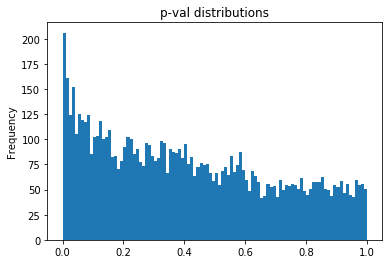

/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/statsmodels/stats/multitest.py:147: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/statsmodels/stats/multitest.py:251: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


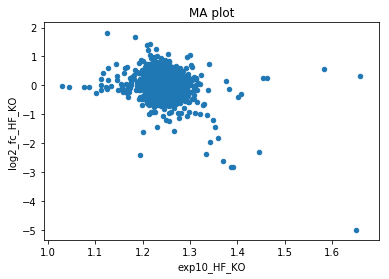

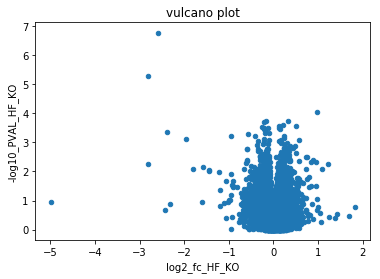

In [12]:

#t-test between high fat diet  and KO 
from scipy.stats import ttest_ind
onesample_results = ttest_ind(norm_df[['HF_1','HF_2','HF_3']].T, norm_df[['KO_1','KO_2','KO_3']].T)
utilities.make_analysis(norm_df, onesample_results, tag='HF_KO')



/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/statsmodels/stats/multitest.py:147: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/statsmodels/stats/multitest.py:251: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1]

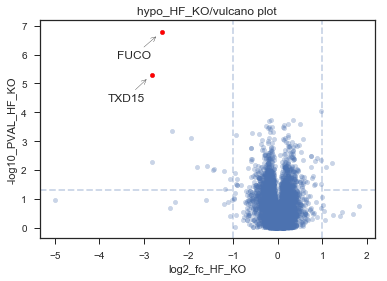

In [36]:
#t-test between normal diet and KO - high fat diet 
#from scipy.stats import ttest_ind
#onesample_results = ttest_ind(norm_df[['ND_1','ND_2','ND_3']].T, norm_df[['KO_1','KO_2','KO_3']].T)
#utilities.make_analysis(norm_df, onesample_results, tag='ND_KO')
tag_1='HF'
tag_2='KO'
import os
tag = tag_1 +'_'+tag_2
os.makedirs('hypo_'+tag)
sns.set(style="ticks")
from statsmodels.sandbox.stats.multicomp import multipletests
def make_analysis(norm_df, onesample_results, tag):
    
    # Set up the figure
    f, ax = plt.subplots()
    #ax.set_aspect("equal")
    # Draw the two density plots
        #correct for multy-hypotesis
    norm_df['T_'+tag]=onesample_results[0]
    norm_df['PVAL_'+tag]=onesample_results[1]         
    norm_df['-log10_PVAL_'+tag] = -np.log10(norm_df['PVAL_'+tag])
    p_adjusted = multipletests(norm_df['PVAL_'+tag], method='bonferroni')
    norm_df['PVAL_'+tag+'_ADJ']=p_adjusted[1]
    norm_df.plot(kind='scatter',x='log2_fc_'+tag,y='-log10_PVAL_'+tag, ax=ax, alpha=0.3)
    prots = ['tr|Q3TCW3|Q3TCW3_MOUSE Putative uncharacterized protein OS=Mus musculus GN=Fuca1 PE=2 SV=1;sp|Q99LJ1|FUCO_MOUSE Tissue alpha-L-fucosidase OS=Mus musculus GN=Fuca1 PE=1 SV=1',
             'sp|Q6P6J9|TXD15_MOUSE Thioredoxin domain-containing protein 15 OS=Mus musculus GN=Txndc15 PE=1 SV=1',
            ]
    norm_df.loc[prots].plot(kind='scatter',x='log2_fc_'+tag,y='-log10_PVAL_'+tag, ax=ax, c='r')
    
    x=norm_df.loc[prots[0]]['log2_fc_'+tag]-0.1
    y=norm_df.loc[prots[0]]['-log10_PVAL_'+tag]-0.1
    xt = norm_df.loc[prots[0]]['log2_fc_'+tag]-1
    yt = norm_df.loc[prots[0]]['-log10_PVAL_'+tag]-0.9
    ax.annotate('FUCO', 

                xy=(x, y), 
                xytext=(xt, yt),
            arrowprops=dict(facecolor='black',  arrowstyle="->"),
            )
    
    x=norm_df.loc[prots[1]]['log2_fc_'+tag]-0.1
    y=norm_df.loc[prots[1]]['-log10_PVAL_'+tag]-0.1
    xt = norm_df.loc[prots[1]]['log2_fc_'+tag]-1
    yt = norm_df.loc[prots[1]]['-log10_PVAL_'+tag]-0.9
    ax.annotate('TXD15', 

                xy=(x, y), 
                xytext=(xt, yt),
            arrowprops=dict(facecolor='black',  arrowstyle="->"),
            )
    #norm_df = norm_df[['log2_fc_'+tag, '-log10_PVAL_'+tag]]
    #norm_df = norm_df.dropna()
    #norm_df.plot(kind='scatter',x='log2_fc_'+tag,y='-log10_PVAL_'+tag, alpha=0.1,s=1,ax=ax)
    #sns.kdeplot(norm_df['log2_fc_'+tag], norm_df['-log10_PVAL_'+tag],
                 #cmap="Blues", shade=True, shade_lowest=False, ax=ax)
    
    ax.axvline(x=1, ymin=0, ymax=1, ls='--',alpha=0.3)
    ax.axvline(x=-1, ymin=0, ymax=1, ls='--',alpha=0.3)
    ax.axhline(y=-np.log10(0.05), xmin=0, xmax=0.58, ls='--',alpha=0.3)
    ax.axhline(y=-np.log10(0.05), xmin=0.85, xmax=1, ls='--',alpha=0.3)
    plt.title('hypo_'+tag+'/'+'vulcano plot')
    plt.savefig('hypo_'+tag+'/'+'vulcano.svg')
    plt.show()
    return 

onesample_results = ttest_ind(norm_df[[tag_1+'_1',tag_1+'_2',tag_1+'_3']].T, 
                              norm_df[[tag_2+'_1',tag_2+'_2',tag_2+'_3']].T)
make_analysis(norm_df, onesample_results, tag=tag) 
temp = norm_df[[tag_1+'_1',tag_1+'_2',tag_1+'_3',
                tag_2+'_1',tag_2+'_2',tag_2+'_3','log2_fc_'+tag,'-log10_PVAL_'+tag]]
temp = temp.sort_values('-log10_PVAL_'+tag)
temp = temp[(temp['log2_fc_'+tag]<-1) | (temp['log2_fc_'+tag]<-1)].sort_values('-log10_PVAL_'+tag)
temp.head()
temp.to_csv('hypo_'+tag+'/'+'data_'+tag+'.csv')

In [13]:
#print the significant one in the normalized and raw data
test = norm_df[norm_df['PVAL_HF_KO_ADJ']<0.05]
test[['ND_1','ND_2','ND_3','HF_1','HF_2','HF_3','KO_1','KO_2','KO_3','PVAL_HF_KO_ADJ','log2_fc_HF_KO']]


,ND_1,ND_2,ND_3,HF_1,HF_2,HF_3,KO_1,KO_2,KO_3,PVAL_HF_KO_ADJ,log2_fc_HF_KO
Fasta headers,,,,,,,,,,,
tr|Q3TCW3|Q3TCW3_MOUSE Putative uncharacterized protein OS=Mus musculus GN=Fuca1 PE=2 SV=1;sp|Q99LJ1|FUCO_MOUSE Tissue alpha-L-fucosidase OS=Mus musculus GN=Fuca1 PE=1 SV=1,0.038036,0.039372,0.035911,0.041081,0.046725,0.044523,0.275486,0.269534,0.267300,0.001293,-2.597851
sp|Q6P6J9|TXD15_MOUSE Thioredoxin domain-containing protein 15 OS=Mus musculus GN=Txndc15 PE=1 SV=1,0.036296,0.031833,0.031901,0.030934,0.041156,0.043176,0.289043,0.297021,0.274611,0.039030,-2.812127


In [14]:
test = df[norm_df['PVAL_HF_KO_ADJ']<0.05]
test[['ND_1','ND_2','ND_3','HF_1','HF_2','HF_3','KO_1','KO_2','KO_3']]

,ND_1,ND_2,ND_3,HF_1,HF_2,HF_3,KO_1,KO_2,KO_3
Fasta headers,,,,,,,,,
tr|Q3TCW3|Q3TCW3_MOUSE Putative uncharacterized protein OS=Mus musculus GN=Fuca1 PE=2 SV=1;sp|Q99LJ1|FUCO_MOUSE Tissue alpha-L-fucosidase OS=Mus musculus GN=Fuca1 PE=1 SV=1,53756.0,56343.0,49494.0,58961.0,61111.0,68012.0,594850.0,360720.0,441800.0
sp|Q6P6J9|TXD15_MOUSE Thioredoxin domain-containing protein 15 OS=Mus musculus GN=Txndc15 PE=1 SV=1,29325.0,26042.0,25134.0,25381.0,30771.0,37704.0,356790.0,227240.0,259470.0


In [15]:
norm_df.to_csv('hypo_norm.csv')

In [16]:
for index, temp in enumerate(df.index.values):
    if 'Q61081' in temp:
        print (index,temp)

5248 sp|Q61081|CDC37_MOUSE Hsp90 co-chaperone Cdc37 OS=Mus musculus GN=Cdc37 PE=1 SV=1;tr|A0A1L1STC0|A0A1L1STC0_MOUSE Hsp90 co-chaperone Cdc37 (Fragment) OS=Mus musculus GN=Cdc37 PE=1 SV=1


In [23]:
temp = df/df.mean()
temp.iloc[5248,:]

ND_1    0.026602
ND_2    0.040546
ND_3    0.035304
HF_1    0.043569
HF_2    0.014614
HF_3    0.034561
KO_1    0.032654
KO_2    0.032252
KO_3    0.047026
null    0.028302
Name: sp|Q61081|CDC37_MOUSE Hsp90 co-chaperone Cdc37 OS=Mus musculus GN=Cdc37 PE=1 SV=1;tr|A0A1L1STC0|A0A1L1STC0_MOUSE Hsp90 co-chaperone Cdc37 (Fragment) OS=Mus musculus GN=Cdc37 PE=1 SV=1, dtype: float64

In [22]:
norm_df.iloc[5248,:]

ND_1                 0.088042
ND_2                 0.131641
ND_3                 0.115061
HF_1                 0.142574
HF_2                 0.058555
HF_3                 0.112119
KO_1                 0.106057
KO_2                 0.105516
KO_3                 0.151619
null                 0.099928
mean_ND              0.115061
mean_HF              0.112119
mean_KO              0.106057
log2_fc_HF_ND       -0.037366
log2_fc_ND_KO        0.117550
log2_fc_HF_KO        0.080184
exp10_HF_ND          1.255055
exp10_ND_KO          1.247471
exp10_HF_KO          1.243806
T_HF_ND             -0.259139
PVAL_HF_ND           0.808318
PVAL_HF_ND_ADJ       1.000000
-log10_PVAL_HF_ND    0.092418
T_ND_KO             -0.477225
PVAL_ND_KO           0.658106
PVAL_ND_KO_ADJ       1.000000
-log10_PVAL_ND_KO    0.181704
T_HF_KO             -0.575612
PVAL_HF_KO           0.595710
PVAL_HF_KO_ADJ       1.000000
-log10_PVAL_HF_KO    0.224965
Name: sp|Q61081|CDC37_MOUSE Hsp90 co-chaperone Cdc37 OS=Mus musculus G